In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


Reading the data

In [2]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Diamonds are 3D, hence removing all the 2D diamonds

In [4]:
data.shape

(53940, 11)

In [5]:
data = data.drop(data[data['x'] == 0].index)
data = data.drop(data[data['y'] == 0].index)
data = data.drop(data[data['z'] == 0].index)
data.shape

(53920, 11)

Visualisation of all the Outliers

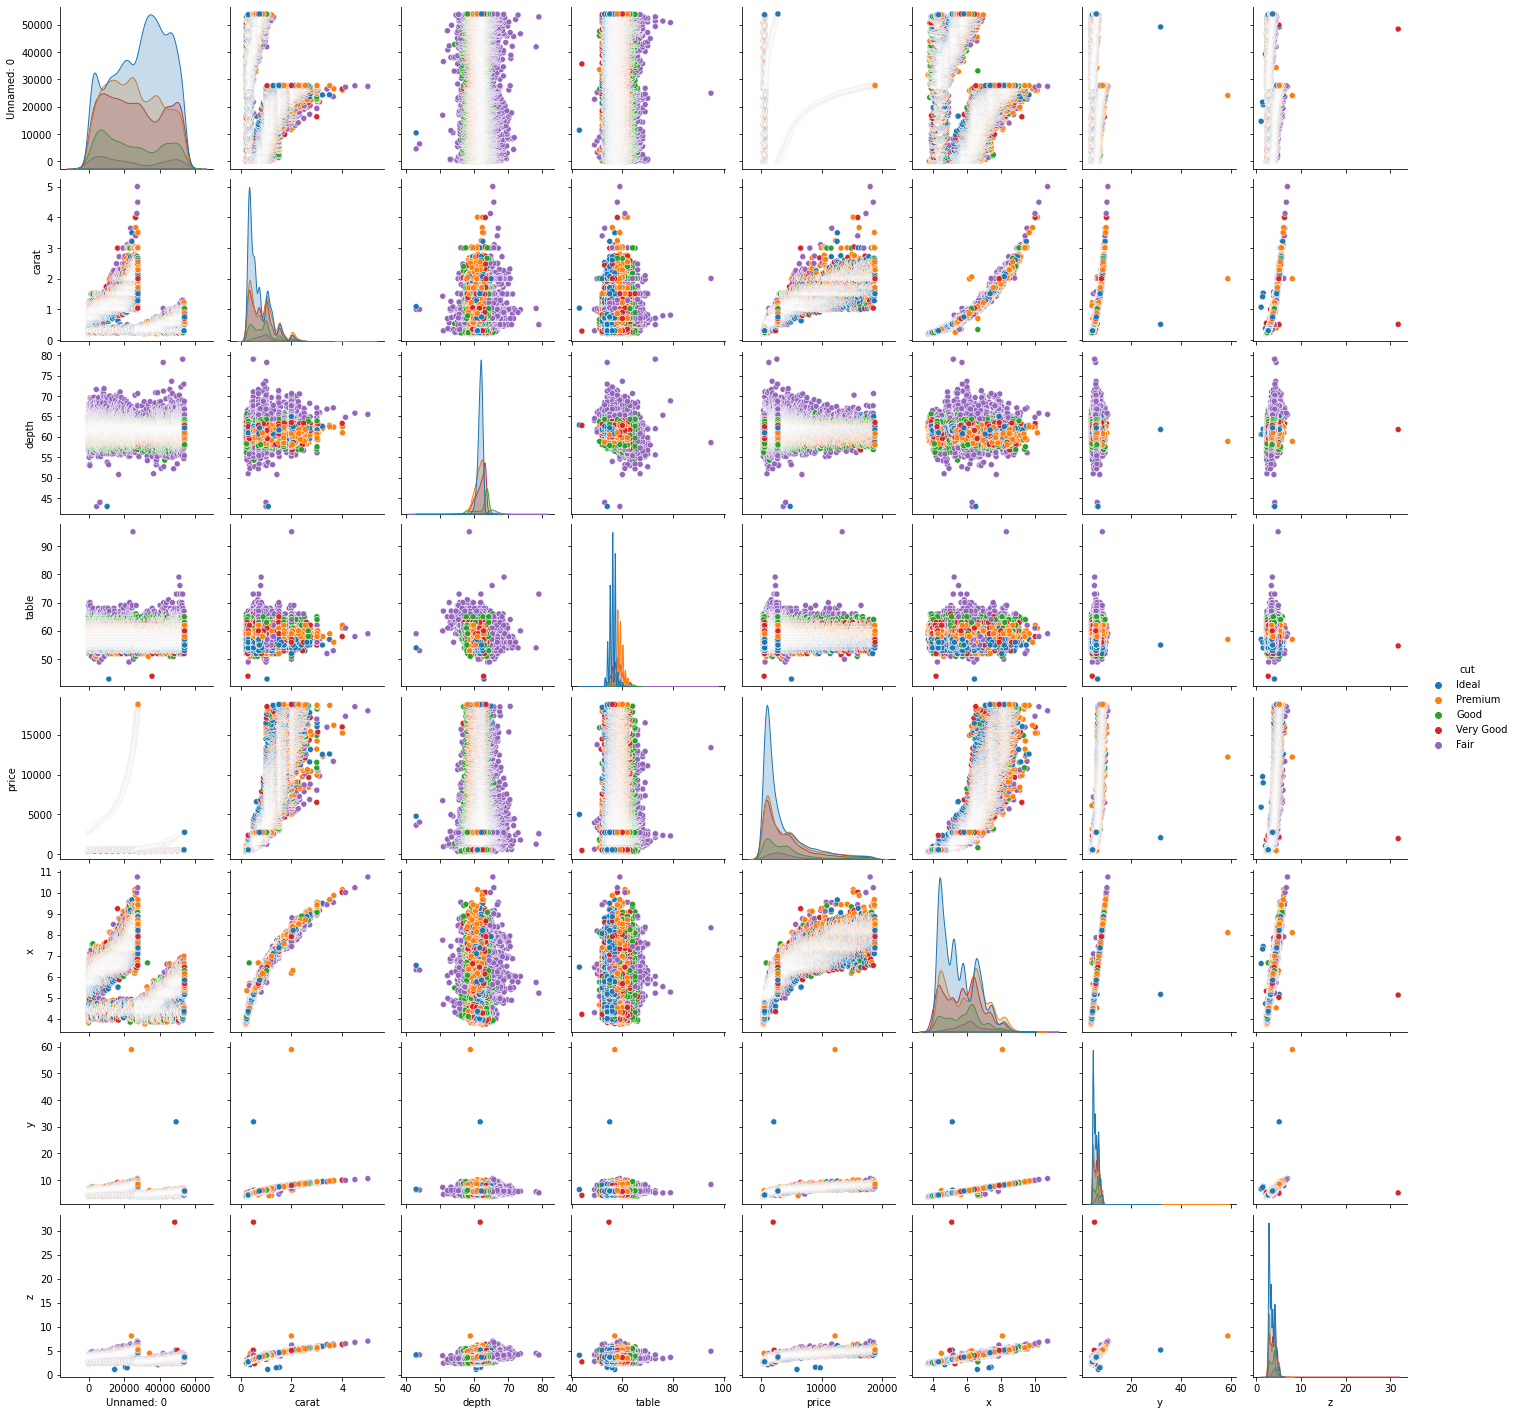

In [6]:
sns.pairplot(data, hue = 'cut')

Removing the outliers

In [7]:
data = data[(data['depth'] < 75)&(data['depth'] > 45)]
data = data[(data['table'] < 80)&(data['table'] > 40)]
data = data[data['x'] < 30]
data = data[data['y'] < 30]
data = data[(data['z'] < 30)&(data['z'] > 2)]

In [8]:
data.shape

(53907, 11)

In [18]:
s = (data.dtypes == object)
categorical_features = list(s[s].index)
categorical_features

['cut', 'color', 'clarity']

In [19]:
label_data = data.copy()
label_encoder = LabelEncoder()
for cols in categorical_features:
    label_data[cols] = label_encoder.fit_transform(label_data[cols])

In [20]:
label_data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
data


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [24]:
label_data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [25]:
label_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


Finally, let’s have a look at the correlation between the features before training a model for the task of Diamond Price prediction

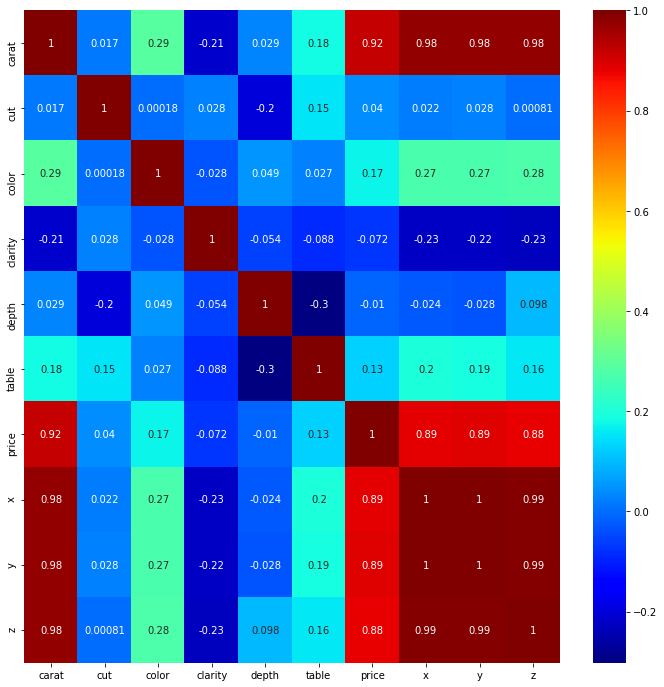

In [26]:
corr_mat = label_data.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_mat, cmap = 'jet', annot = True) #x, y and z show a strong correlation with the target column.

Preparation of data and Training the Model

In [28]:
X = label_data.drop(['price'],axis = 1,inplace = False)
y = label_data['price']

In [29]:
print(X.shape)
print(y.shape)

(53907, 9)
(53907,)


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 2)

Building the Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [33]:
pipeline_lr = Pipeline([('scalar1',StandardScaler()),('lr', LinearRegression())])
pipeline_dr = Pipeline([('scalar1',StandardScaler()),('lr', DecisionTreeRegressor())])
pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])
pipeline_knn = Pipeline([('scalar1',StandardScaler()),('lr', KNeighborsRegressor())])
pipeline_xgb = Pipeline([('scalar1',StandardScaler()),('lr', XGBRegressor())])

In [45]:
pipelines = [pipeline_lr,pipeline_dr,pipeline_rf,pipeline_knn,pipeline_xgb]
pipeline_lr.fit(X_train,y_train)
y_pred_lr = pipeline_lr.predict(X_test)
print('The R2 score for LinearRegression is ' + str(metrics.r2_score(y_test, y_pred_lr)))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_lr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

pipeline_dr.fit(X_train,y_train)
y_pred_dr = pipeline_dr.predict(X_test)
print('The R2 score for DecisionTreeRegression is ' + str(metrics.r2_score(y_test, y_pred_dr)))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_dr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_dr)))

pipeline_lr.fit(X_train,y_train)
y_pred_rf = pipeline_lr.predict(X_test)
print('The R2 score for RandomForestRegression is ' + str(metrics.r2_score(y_test, y_pred_rf)))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_rf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

pipeline_lr.fit(X_train,y_train)
y_pred_knn = pipeline_lr.predict(X_test)
print('The R2 score for KNeighborsRegressor is ' + str(metrics.r2_score(y_test, y_pred_knn)))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_knn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

pipeline_lr.fit(X_train,y_train)
y_pred_xgb = pipeline_lr.predict(X_test)
print('The R2 score for XGBRegression is ' + str(metrics.r2_score(y_test, y_pred_xgb)))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_xgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))


The R2 score for LinearRegression is 0.8860033637406097
MSE: 1804440.1177991221
RMSE: 1343.2945015145124
The R2 score for DecisionTreeRegression is 0.9648678335718822
MSE: 556103.1676745566
RMSE: 745.7232513972973
The R2 score for RandomForestRegression is 0.8860033637406097
MSE: 1804440.1177991221
RMSE: 1343.2945015145124
The R2 score for KNeighborsRegressor is 0.8860033637406097
MSE: 1804440.1177991221
RMSE: 1343.2945015145124
The R2 score for XGBRegression is 0.8860033637406097
MSE: 1804440.1177991221
RMSE: 1343.2945015145124
